<a href="https://colab.research.google.com/github/nikhilScripts/Machine-learning/blob/main/deeplearning_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip

--2025-02-06 14:53:53--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.172.170.8, 18.172.170.43, 18.172.170.106, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.172.170.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.06s   

2025-02-06 14:53:53 (49.9 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [ ]:
!unzip *.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [ ]:
import os
import numpy as np
import unicodedata
import string
import torch
import torch.nn as nn

Getting data

In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
n_letters

57

In [ ]:
# converting all data in ascii words
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [ ]:
print(f'Converting unicode to ascii words:  {unicodeToAscii("Ślusàrski")} ')

Converting unicode to ascii words:  Slusarski 


In [ ]:
all_names = []
all_country = []

In [ ]:
for f in os.listdir('/content/data/names'):
  fl = open('/content/data/names/'+f, 'r')
  lis = fl.readlines()
  clean_lis = list(map(unicodeToAscii, lis))
  all_names.extend(clean_lis)
  all_country.extend([f.split('.')[0]] * len(clean_lis))

In [ ]:
print(clean_lis)

['Adam', 'Ahearn', 'Aodh', 'Aodha', 'Aonghuis', 'Aonghus', 'Bhrighde', 'Bradach', 'Bradan', 'Braden', 'Brady', 'Bran', 'Brannon', 'Brian', 'Callaghan', 'Caomh', 'Carey', 'Casey', 'Cassidy', 'Cathain', 'Cathan', 'Cathasach', 'Ceallach', 'Ceallachan', 'Cearbhall', 'Cennetig', 'Ciardha', 'Clark', 'Cleirich', 'Cleirigh', 'Cnaimhin', 'Coghlan', 'Coilean', 'Collins', 'Colman', 'Conall', 'Conchobhar', 'Conn', 'Connell', 'Connolly', 'Cormac', 'Corraidhin', 'Cuidightheach', 'Curran', 'Dubhshlaine', 'Dalach', 'Daly', 'Damhain', 'Damhan', 'Delaney', 'Desmond', 'Devin', 'Diarmaid', 'Doherty', 'Domhnall', 'Donnchadh', 'Donndubhan', 'Donnell', 'Donoghue', 'Donovan', 'Doyle', 'Dubhain', 'Dubhan', 'Duncan', 'Eoghan', 'Eoin', 'Eoin', 'Faolan', 'Farrell', 'Fearghal', 'Fergus', 'Finn', 'Finnegan', 'Fionn', 'Flanagan', 'Flann', 'Flynn', 'Gallchobhar', 'Gerald', 'Giolla', 'Gorman', 'Hayden', 'Ivor', 'John', 'Kavanagh', 'Keefe', 'Kelly', 'Kennedy', 'Lennon', 'Login', 'Macclelland', 'Macdermott', 'Maceachthi

In [ ]:
n_rows = len(all_names)
print(n_rows)

20074


In [ ]:
emb = torch.eye(n_letters)
mapping = dict(zip(np.unique(all_country), range(n_rows)))

In [ ]:
mapping

{'Arabic': 0,
 'Chinese': 1,
 'Czech': 2,
 'Dutch': 3,
 'English': 4,
 'French': 5,
 'German': 6,
 'Greek': 7,
 'Irish': 8,
 'Italian': 9,
 'Japanese': 10,
 'Korean': 11,
 'Polish': 12,
 'Portuguese': 13,
 'Russian': 14,
 'Scottish': 15,
 'Spanish': 16,
 'Vietnamese': 17}

In [ ]:
emb.shape

torch.Size([57, 57])

In [ ]:
def get_data(idx):
  name = all_names[idx]
  country = all_country[idx]
  name_char_lis = np.array(list(name))
  return name_char_lis

In [ ]:
print(get_data(0))

['A' 'h' 'n']


In [ ]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [ ]:
# [N, g , y, e, n] -> indixes  -> emb[]    ONE HOT ENCODING
def get_data(idx):
  name = all_names[idx]
  country = all_country[idx]
  name_char_lis = np.array(list(name))
  indices = np.where(name_char_lis[..., None] == np.array(list(all_letters)))[1]
  return emb[torch.from_numpy(indices)] , torch.tensor(mapping[country])

In [ ]:
get_data(0)

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.]]),
 tensor(11))

In [ ]:
class Net(nn.Module):
  def __init__(self, n_country, n_letters):
    super(Net, self).__init__()
    self.rnn = nn.RNN(n_letters, 2* n_letters)
    self.fc = nn.Linear(2 * n_letters, n_country)
  def forward(self, x):
    out, _ = self.rnn(x)
    out1 = self.fc(out[-1 , :])
    return out1

In [ ]:
model = Net(len(np.unique(all_country)) , n_letters)
model

Net(
  (rnn): RNN(57, 114)
  (fc): Linear(in_features=114, out_features=18, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
# num_epochs = 30
# all_losses = []
# for epoch in range(num_epochs):
#   arr = np.arange(n_rows)
#   np.random.shuffle(arr)
#   epoch_loss = 0
#   for i in arr:
#     data, target = get_data(i)
#     output = model(data)
#     loss = loss_fn(output, target)
#     # Detach the loss, move to CPU, and convert to NumPy array
#     epoch_loss += loss.detach().cpu().numpy()

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#   all_losses.append(epoch_loss)

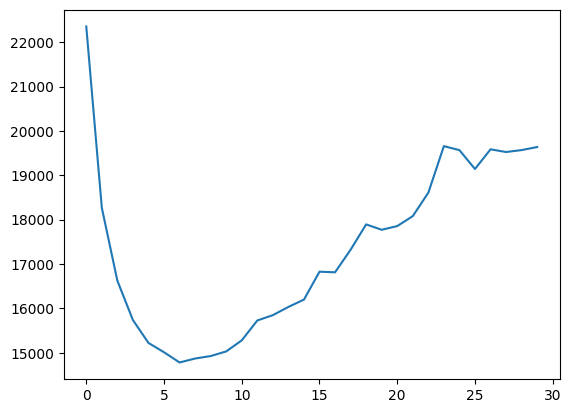

In [ ]:
import os
import numpy as np
import unicodedata
import string
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# ... (rest of your code) ...

# Check if CUDA is available and move the model to the GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU.")

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# The "capturable" option is typically used for advanced scenarios
# involving CUDA graphs. Unless specifically needed, it's generally
# recommended to leave it at its default value (False).
# for param_group in optimizer.param_groups:
#     param_group['capturable'] = True

num_epochs = 30
all_losses = []
for epoch in range(num_epochs):
    arr = np.arange(n_rows)
    np.random.shuffle(arr)
    epoch_loss = 0
    for i in arr:
        # Move data and target to the appropriate device
        data, target = get_data(i)
        data, target = data.to(device), target.to(device)

        output = model(data)
        loss = loss_fn(output, target)
        epoch_loss += loss.detach().cpu().numpy()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    all_losses.append(epoch_loss)

plt.plot(all_losses)

# RNN_V1 -> classifying names

In [ ]:
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

def findFiles(path): return glob.glob(path)
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip()) for line in some_file]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

# categories: 18 ['Korean', 'Dutch', 'Italian', 'Scottish', 'Portuguese', 'Russian', 'Czech', 'Chinese', 'Vietnamese', 'Greek', 'Polish', 'Arabic', 'Spanish', 'French', 'English', 'Japanese', 'German', 'Irish']
O'Neal


Creating a network

In [ ]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

preparing for training

In [ ]:
import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

In [ ]:
# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# ``LongTensor`` of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

In [ ]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

Training the network

In [ ]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()

    rnn.zero_grad()

    loss = torch.Tensor([0]) # you can also just simply use ``loss = 0``

    for i in range(input_line_tensor.size(0)):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [ ]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
from tqdm.auto import tqdm
rnn = RNN(n_letters, 128, n_letters)

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every ``plot_every`` ``iters``

start = time.time()

for iter in tqdm(range(1, n_iters + 1)):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

  0%|          | 0/100000 [00:00<?, ?it/s]

0m 15s (5000 5%) 2.6977
0m 31s (10000 10%) 2.2369
0m 47s (15000 15%) 2.6447
1m 2s (20000 20%) 2.4230
1m 17s (25000 25%) 2.8696
1m 33s (30000 30%) 2.3886
1m 49s (35000 35%) 1.9659
2m 4s (40000 40%) 2.3473
2m 19s (45000 45%) 2.5756
2m 35s (50000 50%) 2.1930
2m 50s (55000 55%) 2.0102
3m 6s (60000 60%) 2.2169
3m 21s (65000 65%) 2.7443
3m 36s (70000 70%) 2.0597
3m 52s (75000 75%) 2.7558
4m 8s (80000 80%) 2.1951
4m 23s (85000 85%) 2.1680
4m 38s (90000 90%) 1.8149
4m 54s (95000 95%) 2.0767
5m 9s (100000 100%) 1.9402


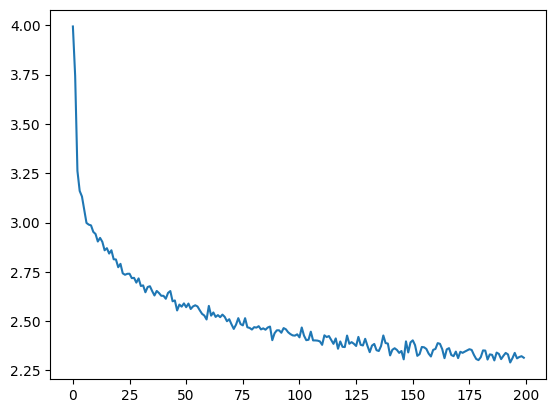

In [ ]:
# plot loss
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

In [ ]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHi')

Rovanov
Uarinov
Sharakov
Garen
Eerter
Rangerr
Santara
Paran
Anten
Chan
Han
ino


# Translation with a sequence